## Fully connected classifier on the extracted MNIST features (fc autoencoder, cnn autoencoder, vgg16) 
In this notebook we will train a classifier on the extractet features of the MNIST dataset. We only use 100 trainig examples and predict 2000 digits. Eventually we compare the performace for all features extractiong methods, we used in excercise 16.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

Loading the features of all five methods

In [2]:
import urllib
import os
if not os.path.isfile('fc_autoencoder_MNIST.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/uxdwft0o40qcciw/fc_autoencoder_MNIST.npz?dl=1",
    "fc_autoencoder_MNIST.npz")
%ls -hl fc_autoencoder_MNIST.npz

if not os.path.isfile('fc_autoencoder_denoising_MNIST.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/5ztqwzydj6mjyd8/fc_autoencoder_denoising_MNIST.npz?dl=1",
    "fc_autoencoder_denoising_MNIST.npz")
%ls -hl fc_autoencoder_denoising_MNIST.npz

if not os.path.isfile('cnn_autoencoder_MNIST.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/m95f3qitfpl9qud/cnn_autoencoder_MNIST.npz?dl=1",
    "cnn_autoencoder_MNIST.npz")
%ls -hl cnn_autoencoder_MNIST.npz

if not os.path.isfile('cnn_autoencoder_denoiseing_MNIST.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/49eyt4kzkbmiwlg/cnn_autoencoder_denoiseing_MNIST.npz?dl=1",
    "cnn_autoencoder_denoiseing_MNIST.npz")
%ls -hl cnn_autoencoder_denoiseing_MNIST.npz

if not os.path.isfile('vgg16_fcl1_MNIST.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/207krpgbyo7hc9u/vgg16_fcl1_MNIST.npz?dl=1",
    "vgg16_fcl1_MNIST.npz")
%ls -hl vgg16_fcl1_MNIST.npz


-rw-r--r-- 1 root root 323K Apr  3 11:19 fc_autoencoder_MNIST.npz
-rw-r--r-- 1 root root 316K Apr  3 11:19 fc_autoencoder_denoising_MNIST.npz
-rw-r--r-- 1 root root 3.8M Apr  3 11:19 cnn_autoencoder_MNIST.npz
-rw-r--r-- 1 root root 3.8M Apr  3 11:19 cnn_autoencoder_denoiseing_MNIST.npz
-rw-r--r-- 1 root root 79M Apr  3 11:21 vgg16_fcl1_MNIST.npz


In [3]:
Data=np.load("fc_autoencoder_MNIST.npz")
representation_fc = Data["arr_0"]
y_test_fc = Data["arr_1"]
Data=np.load("fc_autoencoder_denoising_MNIST.npz")
representation_fcd = Data["arr_0"]
y_test_fcd = Data["arr_1"]
Data=np.load("cnn_autoencoder_MNIST.npz")
representation_cnn = Data["arr_0"]
y_test_cnn = Data["arr_1"]
Data=np.load("cnn_autoencoder_denoiseing_MNIST.npz")
representation_cnnd = Data["arr_0"]
y_test_cnnd = Data["arr_1"]
Data=np.load("vgg16_fcl1_MNIST.npz")
representation_vgg = Data["arr_0"]
y_test_vgg = Data["arr_1"]

In [4]:
print(representation_fc.shape)
print(representation_fcd.shape)
print(representation_cnn.shape)
print(representation_cnnd.shape)
print(representation_vgg.shape)

(2500, 32)
(2500, 32)
(2500, 392)
(2500, 392)
(2500, 4096)


Distribution of our trainig data, we only have two exaples for the digit 8!

(array([  8.,  14.,   8.,  11.,  14.,   7.,  10.,  15.,   2.,  11.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

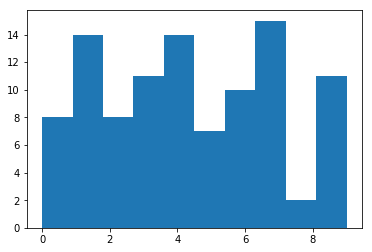

In [5]:
plt.hist(y_test_fc[0:100])

Transforming the labels into one-hot encoding

In [6]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [7]:
y_test_fc=convertToOneHot(y_test_fc,num_classes=10)
y_test_fcd=convertToOneHot(y_test_fcd,num_classes=10)
y_test_cnn=convertToOneHot(y_test_cnn,num_classes=10)
y_test_cnnd=convertToOneHot(y_test_cnnd,num_classes=10)
y_test_vgg=convertToOneHot(y_test_vgg,num_classes=10)

In [8]:
import keras
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.models import Sequential

Using TensorFlow backend.


## fc autoencoder features

In [9]:
model = Sequential()
name = 'fc_classifier'

model.add(Dense(200,activation='relu',input_dim=(representation_fc.shape[1])))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.fit(representation_fc[0:100], y_test_fc[0:100], 
                  batch_size=12, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(representation_fc[100:500], y_test_fc[100:500]))

Train on 100 samples, validate on 400 samples
Epoch 1/30
0s - loss: 2.9585 - acc: 0.1400 - val_loss: 3.5688 - val_acc: 0.1200
Epoch 2/30
0s - loss: 2.2472 - acc: 0.2700 - val_loss: 2.4162 - val_acc: 0.2225
Epoch 3/30
0s - loss: 1.6226 - acc: 0.4400 - val_loss: 2.1080 - val_acc: 0.3500
Epoch 4/30
0s - loss: 1.4009 - acc: 0.5400 - val_loss: 2.0775 - val_acc: 0.4200
Epoch 5/30
0s - loss: 1.1707 - acc: 0.6300 - val_loss: 2.0114 - val_acc: 0.4325
Epoch 6/30
0s - loss: 0.9946 - acc: 0.7200 - val_loss: 1.8844 - val_acc: 0.4850
Epoch 7/30
0s - loss: 0.9592 - acc: 0.6800 - val_loss: 1.7974 - val_acc: 0.4850
Epoch 8/30
0s - loss: 0.7223 - acc: 0.7900 - val_loss: 1.6306 - val_acc: 0.4975
Epoch 9/30
0s - loss: 0.7249 - acc: 0.7900 - val_loss: 1.5776 - val_acc: 0.5250
Epoch 10/30
0s - loss: 0.6407 - acc: 0.8100 - val_loss: 1.5405 - val_acc: 0.5500
Epoch 11/30
0s - loss: 0.7110 - acc: 0.8000 - val_loss: 1.5117 - val_acc: 0.5600
Epoch 12/30
0s - loss: 0.5687 - acc: 0.8000 - val_loss: 1.4557 - val_acc

In [11]:
preds=np.zeros([2000,10])
for i in range(0,2000):
    preds[i]=model.predict(representation_fc[i+500].reshape(1,representation_fc.shape[1]))
    
pred=np.zeros([2000])
for i in range(0,2000):
    pred[i]=np.argmax(preds[i])

In [12]:
sum(pred==np.argmax(y_test_fc[500:2500],axis=1))/2000.

0.65600000000000003

In [13]:
confusion_matrix(np.argmax(y_test_fc[500:2500],axis=1), pred)

array([[111,   0,  17,   1,   2,  23,  17,   0,   0,   6],
       [  0, 211,   2,   1,   2,   0,   3,   0,   1,   0],
       [ 16,  13, 144,  10,  11,   4,  15,   6,   2,   0],
       [  2,  10,  11, 163,   1,   3,   1,  13,   0,   5],
       [  0,   7,   1,   0, 166,   1,   5,   4,   0,  36],
       [ 44,   0,   1,  24,   8,  62,   8,   5,   3,  16],
       [  8,  11,   7,   0,   3,   6, 146,   0,   0,   1],
       [  1,  22,   4,   0,   5,   0,   0, 158,   1,  17],
       [ 29,  22,  11,  42,   1,  10,  13,   4,  33,  37],
       [  2,  10,   0,   4,  24,   2,   2,  24,   4, 118]])

## fc denoising autoencoder features

In [14]:
model = Sequential()
name = 'fcd_classifier'

model.add(Dense(200,activation='relu',input_dim=(representation_fcd.shape[1])))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(representation_fcd[0:100], y_test_fcd[0:100], 
                  batch_size=12, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(representation_fcd[100:500], y_test_fcd[100:500]))

Train on 100 samples, validate on 400 samples
Epoch 1/30
0s - loss: 2.8961 - acc: 0.1000 - val_loss: 3.4897 - val_acc: 0.1150
Epoch 2/30
0s - loss: 2.0933 - acc: 0.2700 - val_loss: 2.9578 - val_acc: 0.1850
Epoch 3/30
0s - loss: 1.7171 - acc: 0.4100 - val_loss: 2.4943 - val_acc: 0.2500
Epoch 4/30
0s - loss: 1.4878 - acc: 0.4900 - val_loss: 2.2550 - val_acc: 0.2775
Epoch 5/30
0s - loss: 1.3409 - acc: 0.5100 - val_loss: 2.1673 - val_acc: 0.3025
Epoch 6/30
0s - loss: 1.1744 - acc: 0.6200 - val_loss: 2.1555 - val_acc: 0.3325
Epoch 7/30
0s - loss: 1.0742 - acc: 0.6400 - val_loss: 2.1083 - val_acc: 0.3425
Epoch 8/30
0s - loss: 1.0206 - acc: 0.6600 - val_loss: 2.1122 - val_acc: 0.3525
Epoch 9/30
0s - loss: 0.8160 - acc: 0.7400 - val_loss: 2.0447 - val_acc: 0.3675
Epoch 10/30
0s - loss: 0.7576 - acc: 0.7500 - val_loss: 2.0146 - val_acc: 0.4050
Epoch 11/30
0s - loss: 0.8523 - acc: 0.6800 - val_loss: 1.9913 - val_acc: 0.4350
Epoch 12/30
0s - loss: 0.7494 - acc: 0.7000 - val_loss: 1.9156 - val_acc

In [16]:
preds=np.zeros([2000,10])
for i in range(0,2000):
    preds[i]=model.predict(representation_fcd[i+500].reshape(1,representation_fcd.shape[1]))
    
pred=np.zeros([2000])
for i in range(0,2000):
    pred[i]=np.argmax(preds[i])

In [17]:
sum(pred==np.argmax(y_test_fcd[500:2500],axis=1))/2000.

0.55549999999999999

In [18]:
confusion_matrix(np.argmax(y_test_fcd[500:2500],axis=1), pred)

array([[121,   0,   4,   7,   2,  20,  19,   2,   0,   2],
       [  0, 202,   3,   7,   2,   2,   2,   0,   1,   1],
       [  7,  26,  61,  66,   3,   3,  45,   7,   2,   1],
       [  1,   8,   2, 186,   1,   0,   3,   7,   0,   1],
       [  1,  11,   0,   9, 149,   1,  12,  12,   0,  25],
       [ 13,   7,   0,  69,   8,  44,   4,  14,   2,  10],
       [  2,  18,   3,   2,   5,  12, 139,   1,   0,   0],
       [  1,  22,   4,   5,   4,   0,   0, 163,   0,   9],
       [  1,  15,   1, 132,   2,  16,   3,   5,   3,  24],
       [  1,  13,   0,  26,  46,   0,   5,  56,   0,  43]])

## cnn autoencoder features

In [19]:
model = Sequential()
name = 'cnn_classifier'

model.add(Dense(200,activation='relu',input_dim=(representation_cnn.shape[1])))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.fit(representation_cnn[0:100], y_test_cnn[0:100], 
                  batch_size=12, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(representation_cnn[100:500], y_test_cnn[100:500]))

Train on 100 samples, validate on 400 samples
Epoch 1/30
0s - loss: 2.3016 - acc: 0.2800 - val_loss: 2.3508 - val_acc: 0.1825
Epoch 2/30
0s - loss: 1.2759 - acc: 0.5800 - val_loss: 2.1741 - val_acc: 0.2400
Epoch 3/30
0s - loss: 0.8405 - acc: 0.7200 - val_loss: 2.0978 - val_acc: 0.2750
Epoch 4/30
0s - loss: 0.6088 - acc: 0.7900 - val_loss: 1.8648 - val_acc: 0.3425
Epoch 5/30
0s - loss: 0.4283 - acc: 0.9200 - val_loss: 1.5951 - val_acc: 0.4475
Epoch 6/30
0s - loss: 0.3814 - acc: 0.8800 - val_loss: 1.3891 - val_acc: 0.5475
Epoch 7/30
0s - loss: 0.4141 - acc: 0.8900 - val_loss: 1.2563 - val_acc: 0.6000
Epoch 8/30
0s - loss: 0.2667 - acc: 0.9500 - val_loss: 1.2063 - val_acc: 0.6175
Epoch 9/30
0s - loss: 0.2332 - acc: 0.9300 - val_loss: 1.1733 - val_acc: 0.6325
Epoch 10/30
0s - loss: 0.2319 - acc: 0.9400 - val_loss: 1.1282 - val_acc: 0.6450
Epoch 11/30
0s - loss: 0.1913 - acc: 0.9700 - val_loss: 1.0841 - val_acc: 0.6550
Epoch 12/30
0s - loss: 0.1938 - acc: 0.9600 - val_loss: 1.0914 - val_acc

In [21]:
preds=np.zeros([2000,10])
for i in range(0,2000):
    preds[i]=model.predict(representation_cnn[i+500].reshape(1,representation_cnn.shape[1]))
    
pred=np.zeros([2000])
for i in range(0,2000):
    pred[i]=np.argmax(preds[i])

In [22]:
sum(pred==np.argmax(y_test_cnn[500:2500],axis=1))/2000.

0.71599999999999997

In [23]:
confusion_matrix(np.argmax(y_test_cnn[500:2500],axis=1), pred)

array([[143,   0,   4,   0,  12,   8,   4,   0,   3,   3],
       [  0, 203,  11,   1,   2,   1,   2,   0,   0,   0],
       [  6,   4, 174,  13,   9,   1,   4,   6,   1,   3],
       [  0,   6,   6, 169,   3,   3,   3,  10,   0,   9],
       [  0,   1,   2,   0, 192,   0,   2,   0,   0,  23],
       [  4,   3,   3,  29,  13,  66,  10,   7,  31,   5],
       [  1,   3,   4,   0,  12,  13, 149,   0,   0,   0],
       [  1,   9,   5,   0,  12,   0,   0, 143,   0,  38],
       [  4,  13,  13,  39,  10,   5,   7,   5,  36,  70],
       [  2,   2,   2,   5,  17,   1,   0,   4,   0, 157]])

## cnn denoising autoencoder features

In [24]:
model = Sequential()
name = 'cnnd_classifier'

model.add(Dense(200,activation='relu',input_dim=(representation_cnnd.shape[1])))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(representation_cnnd[0:100], y_test_cnnd[0:100], 
                  batch_size=12, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(representation_cnnd[100:500], y_test_cnnd[100:500]))

Train on 100 samples, validate on 400 samples
Epoch 1/30
0s - loss: 2.7531 - acc: 0.1500 - val_loss: 2.1715 - val_acc: 0.1650
Epoch 2/30
0s - loss: 1.3246 - acc: 0.5300 - val_loss: 2.0413 - val_acc: 0.2400
Epoch 3/30
0s - loss: 0.8480 - acc: 0.7400 - val_loss: 1.9260 - val_acc: 0.3050
Epoch 4/30
0s - loss: 0.5768 - acc: 0.8700 - val_loss: 1.8072 - val_acc: 0.4000
Epoch 5/30
0s - loss: 0.5336 - acc: 0.8400 - val_loss: 1.7262 - val_acc: 0.4525
Epoch 6/30
0s - loss: 0.4364 - acc: 0.8900 - val_loss: 1.6146 - val_acc: 0.4900
Epoch 7/30
0s - loss: 0.2882 - acc: 0.9400 - val_loss: 1.5240 - val_acc: 0.5300
Epoch 8/30
0s - loss: 0.2669 - acc: 0.9600 - val_loss: 1.4678 - val_acc: 0.5600
Epoch 9/30
0s - loss: 0.2308 - acc: 0.9500 - val_loss: 1.4351 - val_acc: 0.5600
Epoch 10/30
0s - loss: 0.1820 - acc: 0.9800 - val_loss: 1.4122 - val_acc: 0.5750
Epoch 11/30
0s - loss: 0.2482 - acc: 0.9300 - val_loss: 1.3755 - val_acc: 0.6000
Epoch 12/30
0s - loss: 0.2315 - acc: 0.9700 - val_loss: 1.3440 - val_acc

In [26]:
preds=np.zeros([2000,10])
for i in range(0,2000):
    preds[i]=model.predict(representation_cnnd[i+500].reshape(1,representation_cnnd.shape[1]))
    
pred=np.zeros([2000])
for i in range(0,2000):
    pred[i]=np.argmax(preds[i])

In [27]:
sum(pred==np.argmax(y_test_cnnd[500:2500],axis=1))/2000.

0.61599999999999999

In [28]:
confusion_matrix(np.argmax(y_test_cnnd[500:2500],axis=1), pred)

array([[134,   0,   7,   3,   3,   4,  20,   2,   0,   4],
       [  0, 193,  13,   2,   3,   0,   3,   5,   0,   1],
       [  9,   4, 152,  19,   6,   0,  14,  13,   0,   4],
       [  1,  11,   8, 157,   2,   0,   2,  25,   0,   3],
       [  0,   2,   7,   2, 148,   0,   4,   6,   0,  51],
       [  7,   2,  11,  50,  23,  30,  15,  22,   0,  11],
       [  2,   4,   9,   1,   8,   3, 152,   1,   0,   2],
       [  3,  10,   9,   0,  13,   0,   1, 157,   0,  15],
       [  8,  19,  32,  44,  13,   4,  15,  23,  11,  33],
       [  5,   6,   4,   4,  36,   0,   0,  37,   0,  98]])

## vgg16 features

In [29]:
model = Sequential()
name = 'vgg_classifier'

model.add(Dense(200,activation='relu',input_dim=(representation_vgg.shape[1])))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.fit(representation_vgg[0:100], y_test_vgg[0:100], 
                  batch_size=12, 
                  epochs=30,
                  verbose=2, 
                  validation_data=(representation_vgg[100:500], y_test_vgg[100:500]))

Train on 100 samples, validate on 400 samples
Epoch 1/30
0s - loss: 1.9974 - acc: 0.3700 - val_loss: 5.9962 - val_acc: 0.4450
Epoch 2/30
0s - loss: 0.4567 - acc: 0.9100 - val_loss: 3.2609 - val_acc: 0.5650
Epoch 3/30
0s - loss: 0.3917 - acc: 0.9100 - val_loss: 1.1588 - val_acc: 0.7325
Epoch 4/30
0s - loss: 0.2918 - acc: 0.9100 - val_loss: 1.1643 - val_acc: 0.6950
Epoch 5/30
0s - loss: 0.2308 - acc: 0.9700 - val_loss: 1.2293 - val_acc: 0.6750
Epoch 6/30
0s - loss: 0.1376 - acc: 1.0000 - val_loss: 1.2320 - val_acc: 0.6725
Epoch 7/30
0s - loss: 0.1185 - acc: 0.9900 - val_loss: 0.8928 - val_acc: 0.7375
Epoch 8/30
0s - loss: 0.1019 - acc: 1.0000 - val_loss: 0.7341 - val_acc: 0.7725
Epoch 9/30
0s - loss: 0.0883 - acc: 1.0000 - val_loss: 0.6485 - val_acc: 0.7900
Epoch 10/30
0s - loss: 0.1004 - acc: 0.9800 - val_loss: 0.5937 - val_acc: 0.8075
Epoch 11/30
0s - loss: 0.0745 - acc: 1.0000 - val_loss: 0.6065 - val_acc: 0.8000
Epoch 12/30
0s - loss: 0.0895 - acc: 0.9800 - val_loss: 0.6172 - val_acc

In [31]:
preds=np.zeros([2000,10])
for i in range(0,2000):
    preds[i]=model.predict(representation_vgg[i+500].reshape(1,representation_vgg.shape[1]))
    
pred=np.zeros([2000])
for i in range(0,2000):
    pred[i]=np.argmax(preds[i])

In [32]:
sum(pred==np.argmax(y_test_vgg[500:2500],axis=1))/2000.

0.85150000000000003

In [33]:
confusion_matrix(np.argmax(y_test_vgg[500:2500],axis=1), pred)

array([[166,   1,   0,   2,   0,   1,   5,   1,   0,   1],
       [  0, 214,   0,   1,   3,   0,   0,   2,   0,   0],
       [ 10,   0, 173,  16,   1,   2,   2,  13,   2,   2],
       [  0,   0,   0, 199,   0,   5,   0,   4,   0,   1],
       [  0,   5,   3,   0, 205,   0,   0,   3,   1,   3],
       [  3,   0,   0,  41,   4, 107,   4,  11,   0,   1],
       [ 12,   0,   0,   1,   7,   3, 157,   0,   0,   2],
       [  1,   2,   3,   3,   2,   0,   0, 195,   0,   2],
       [  2,   0,  16,  36,   4,   0,   2,   3, 115,  24],
       [  6,   1,   2,   3,   5,   0,   0,   1,   0, 172]])